In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset_titanic = pd.read_csv("Titanic-Dataset.csv")

In [3]:
dataset_titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.050,NaN,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.000,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.050,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.825,NaN,S


In [4]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analisis Exploratorio

### Analisis Univariado

In [5]:
def calcular_estadisticas(dataset_titanic):
    columnas = ['Age', 'Fare']
    stats = pd.DataFrame(columns=['Media', 'Mediana', 'Moda', 'Máximo', 'Mínimo'])
    for col in columnas:
        media = dataset_titanic[col].mean()
        mediana = dataset_titanic[col].median()
        moda = dataset_titanic[col].mode()[0] 
        maximo = dataset_titanic[col].max()
        minimo = dataset_titanic[col].min()
        stats.loc[col] = [media, mediana, moda, maximo, minimo]
    print(stats)

In [6]:
calcular_estadisticas(dataset_titanic)

          Media  Mediana   Moda    Máximo  Mínimo
Age   29.699118  28.0000  24.00   80.0000    0.42
Fare  32.204208  14.4542   8.05  512.3292    0.00


El analisis muestra que la media de la edad mostraba gente realmente joven a bordo, la tarifa tiene una gran desviacion que miraremos mas adelante.

### Variables categoricas:

In [7]:
dataset_titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
dataset_titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
dataset_titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
dataset_titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
dataset_titanic['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

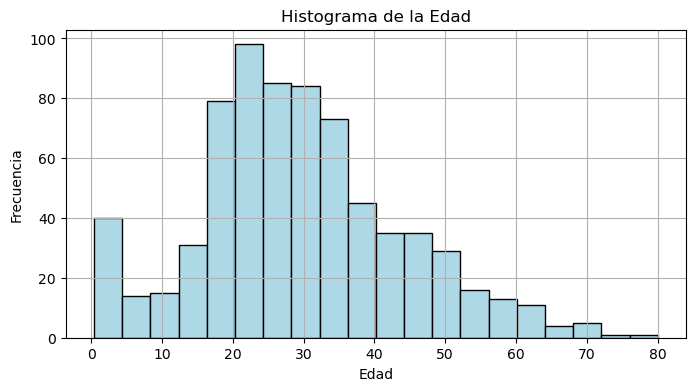

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(dataset_titanic['Age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histograma de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

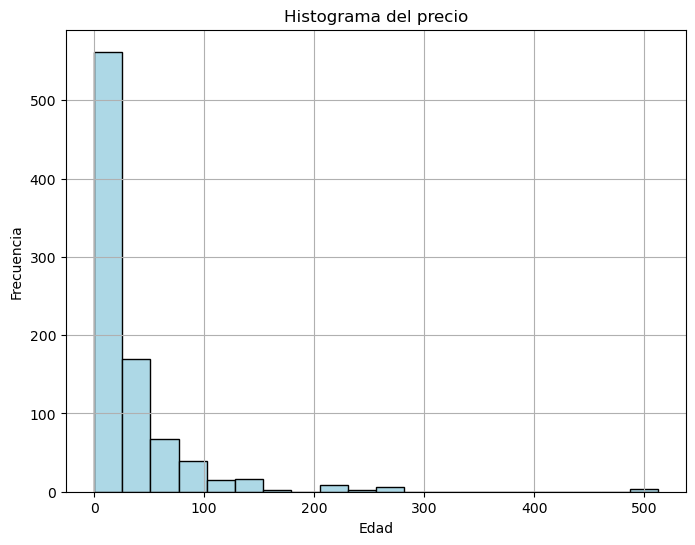

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(dataset_titanic['Fare'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histograma del precio')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [14]:
def plot_category_proportions(column):
    category_counts = column.value_counts(normalize=True)
    colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00FA9A', '#FF4500', '#DA70D6'] 
    random_color = random.choice(colors)
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar', color=random_color)
    category_name = column.name
    plt.title(f'Proporción de cada categoría en {category_name}', fontsize=14)
    plt.xlabel('Categorías', fontsize=12)
    plt.ylabel('Proporción', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
    

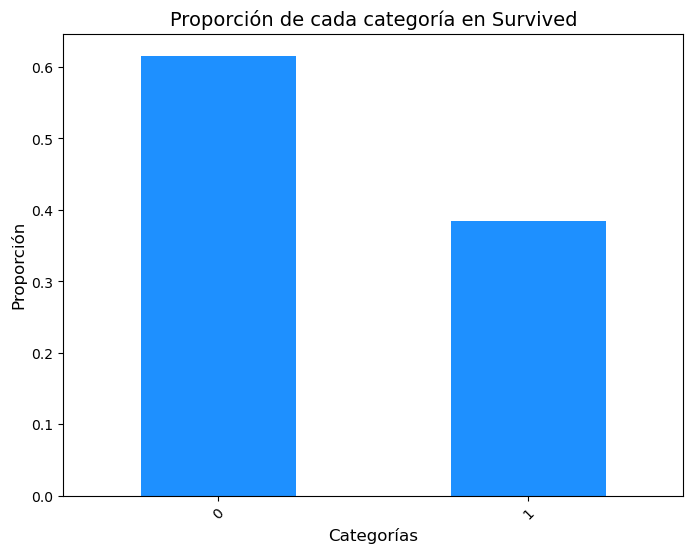

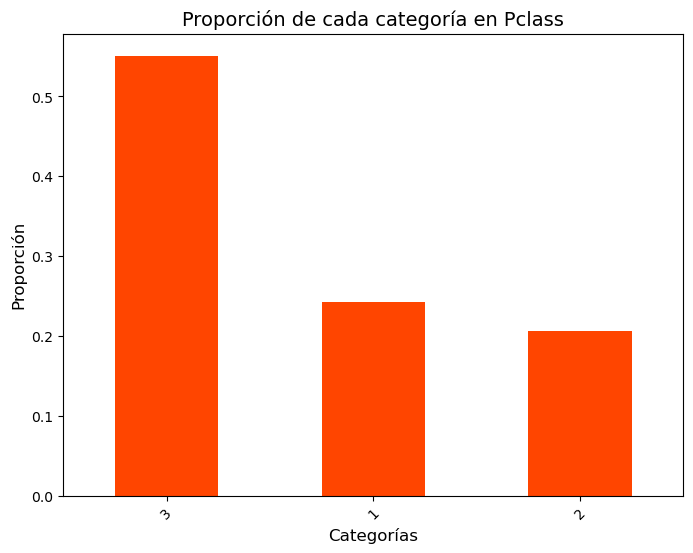

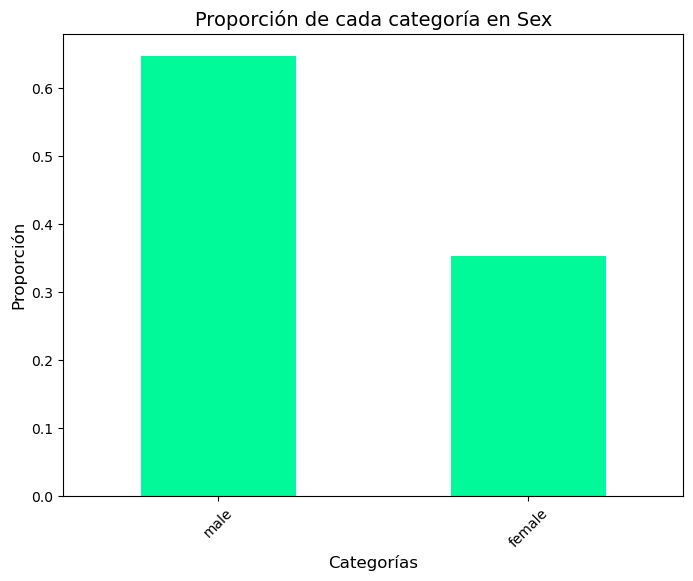

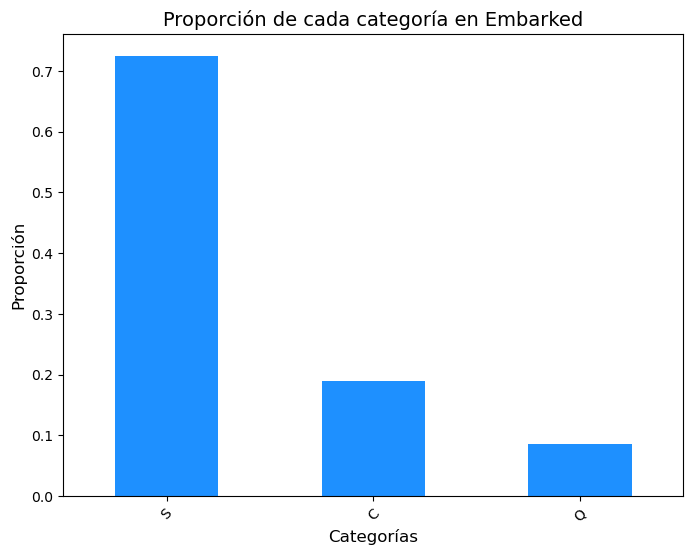

In [15]:
plot_category_proportions(dataset_titanic['Survived'])
plot_category_proportions(dataset_titanic['Pclass'])
plot_category_proportions(dataset_titanic['Sex'])
plot_category_proportions(dataset_titanic['Embarked'])

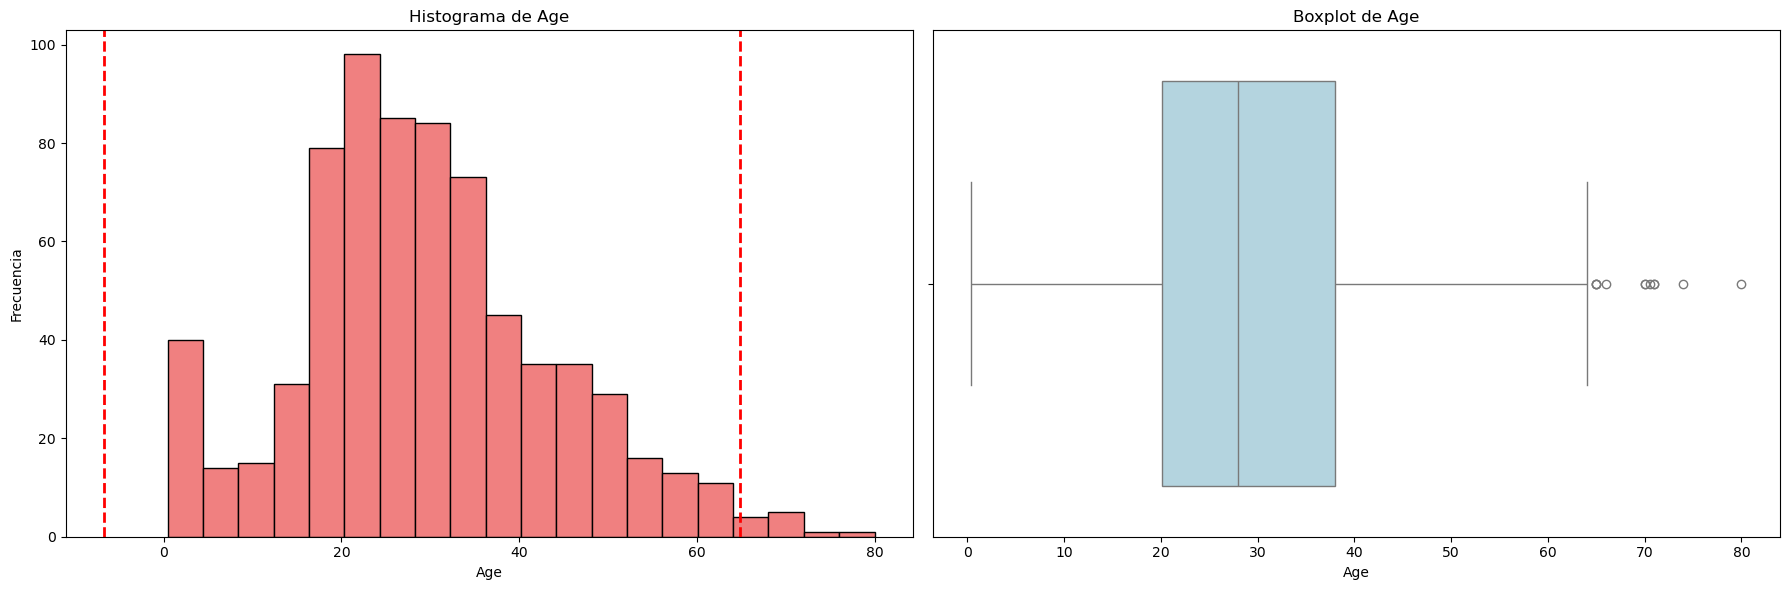

Valores atípicos en Age:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embar

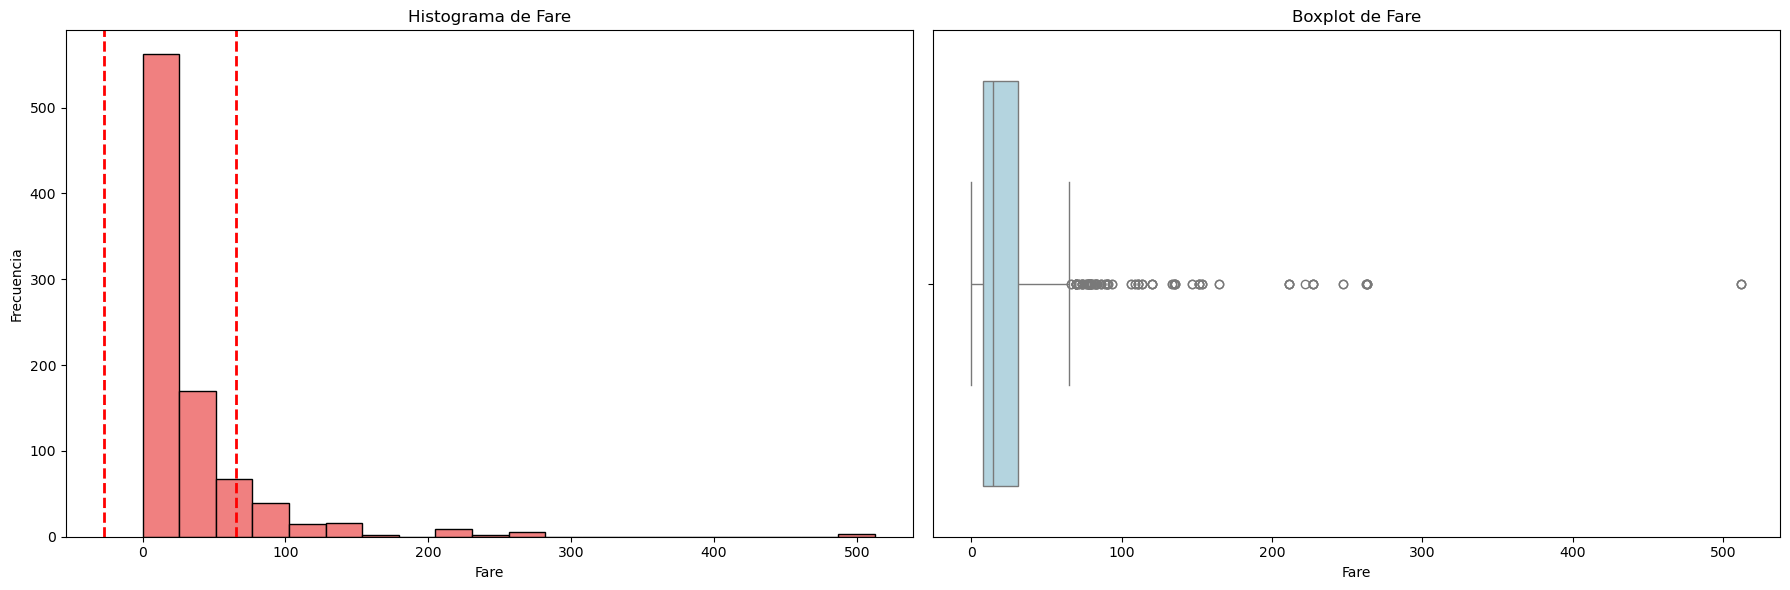

Valores atípicos en Fare:
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                         

In [16]:
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return limite_inferior, limite_superior, outliers

def mostrar_graficos_outliers(data_mall, columna):
    limite_inferior, limite_superior, outliers = detectar_outliers(data_mall, columna)
    
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    
    axs[0].hist(data_mall[columna], bins=20, color='lightcoral', edgecolor='black')
    axs[0].set_title(f'Histograma de {columna}')
    axs[0].set_xlabel(columna)
    axs[0].set_ylabel('Frecuencia')
    axs[0].axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2)
    axs[0].axvline(limite_superior, color='red', linestyle='dashed', linewidth=2)
    
    sns.boxplot(data=data_mall, x=columna, color='lightblue', ax=axs[1])
    axs[1].set_title(f'Boxplot de {columna}')
    

    plt.tight_layout()
    plt.show()
    
    print(f"Valores atípicos en {columna}:")
    print(outliers)

mostrar_graficos_outliers(dataset_titanic, 'Age')
mostrar_graficos_outliers(dataset_titanic, 'Fare')

La variable Age presenta algunos outliers, pero estos son relativamente pequeños y no afectan significativamente el análisis. En cambio, la variable Fare contiene outliers más pronunciados que pueden influir de manera considerable en los resultados. Para mitigar este efecto, se aplica una normalización logarítmica a la variable Fare, con el objetivo de reducir la magnitud de estos valores extremos. Este proceso generará una nueva columna en el conjunto de datos, que contendrá los valores de Fare normalizados.

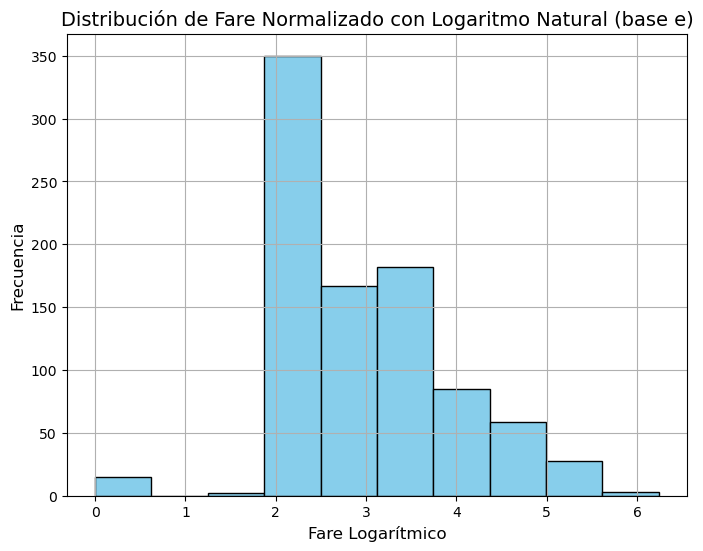

In [17]:
fare_log = np.log(dataset_titanic['Fare'] + 1)  # Aplicar logaritmo natural

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.hist(fare_log, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Fare Normalizado con Logaritmo Natural (base e)', fontsize=14)
plt.xlabel('Fare Logarítmico', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

In [18]:
dataset_titanic['Fare_log'] = np.log(dataset_titanic['Fare'] + 1)  # Se suma 1 para evitar log(0)


In [19]:
dataset_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987


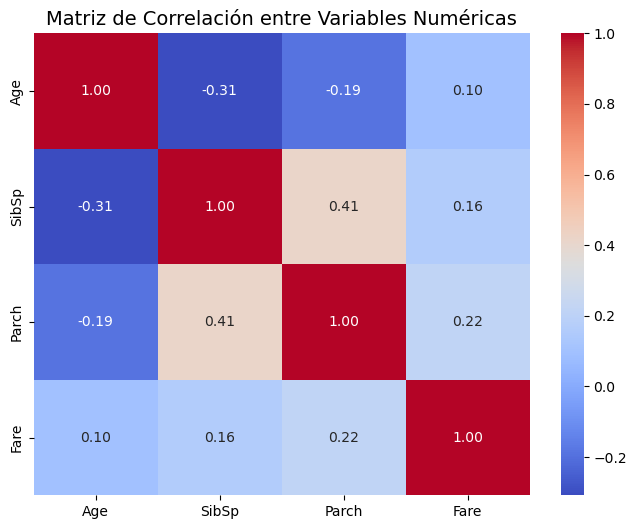

In [20]:
numeric_columns = dataset_titanic[['Age', 'SibSp', 'Parch', 'Fare']]

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=14)
plt.show()

# Analisis Bivariado

Survived    0    1  Total
Sex                      
female     81  233    314
male      468  109    577
Total     549  342    891


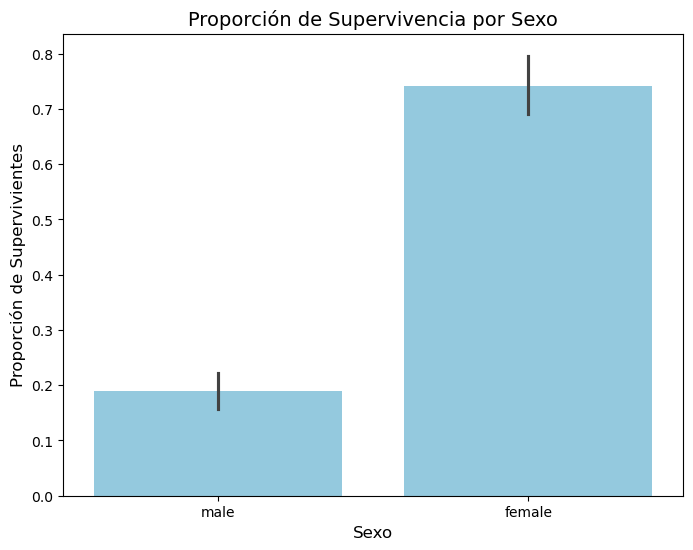

In [21]:
contingency_table = pd.crosstab(dataset_titanic['Sex'], dataset_titanic['Survived'], margins=True, margins_name="Total")
print(contingency_table)

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=dataset_titanic, estimator=lambda x: sum(x) / len(x), color='skyblue')
plt.title('Proporción de Supervivencia por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Proporción de Supervivientes', fontsize=12)
plt.show()

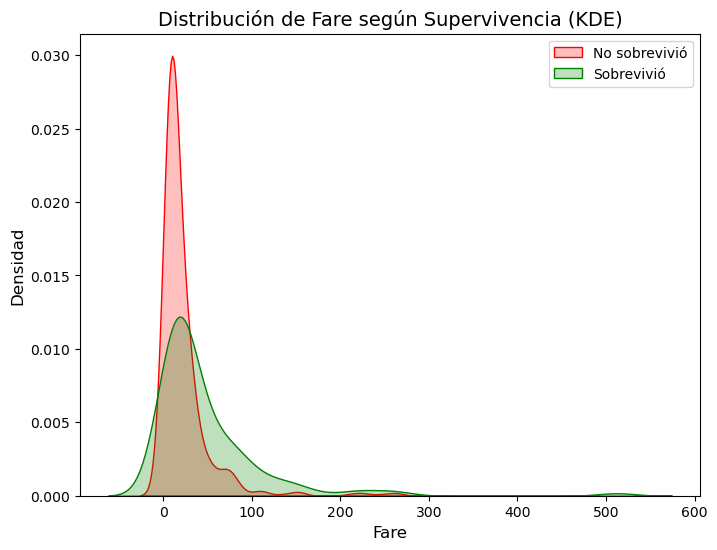

In [22]:
plt.figure(figsize=(8, 6))

sns.kdeplot(dataset_titanic[dataset_titanic['Survived'] == 0]['Fare'], label='No sobrevivió', fill=True, color='red')

sns.kdeplot(dataset_titanic[dataset_titanic['Survived'] == 1]['Fare'], label='Sobrevivió', fill=True, color='green')

plt.title('Distribución de Fare según Supervivencia (KDE)', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()

# Limpieza de datos

In [23]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Fare_log     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [24]:
#Quitaremos varias columnas que no son vitales para el entrenamiento:PassengerId,Name,Ticket,Cabin,Fare (YA QUE FARE LOG TIENE LA NORMALIZACION)
dataset_titanic = dataset_titanic.drop(['PassengerId', 'Name','Ticket','Fare','Cabin'], axis=1)

In [25]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare_log  891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Vemos que hay una columna Age tiene algunos aucentismos, imputaremos por la media, para lograr tener mejor muestra de los datos.

In [26]:
dataset_titanic['Age'] = dataset_titanic['Age'].fillna(dataset_titanic['Age'].mean())

In [27]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare_log  891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Eleccción de caracteristicas y división de dataset

Para el entrenamiento elegiremos las variables:
* Pclass 
* Sex (One Hot encoding)
* Age
* Fare_log  

Revisaremos si con estas caracteristicas es suficiente, las variable target es: Survived  

In [28]:
dataset_titanic = pd.get_dummies(dataset_titanic, columns=['Sex'], drop_first=True)

In [29]:
X = dataset_titanic[['Pclass', 'Age', 'Fare_log', 'Sex_male']]
y = dataset_titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(X_test.head())

     Pclass   Age  Fare_log  Sex_male
331       1  45.5  3.384390      True
733       2  23.0  2.639057      True
382       3  32.0  2.188856      True
704       3  26.0  2.180892      True
813       3   6.0  3.474293     False
     Pclass        Age  Fare_log  Sex_male
709       3  29.699118  2.787834      True
439       2  31.000000  2.442347      True
840       3  20.000000  2.188856      True
720       2   6.000000  3.526361     False
39        3  14.000000  2.504848     False


## Entrenamiento del modelo

Se elige una regresion logistica. Esta regresion debido a la multiclase del problema. y a que la clases estan desbalanceadas, y se presentan buenas relaciones lineales.

In [30]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\033[1mAccuracy: {accuracy:.4f}\033[0m")  # Formato en negrita y 4 decimales

print("\n\033[1mReporte de Clasificación:\033[0m")
print(class_report)

Accuracy: 0.8045

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



El modelo muestra una Gran generalizacion de los datos de test, lo que nos muestra que el modelo y las caracteristicas elegidas son suficientes

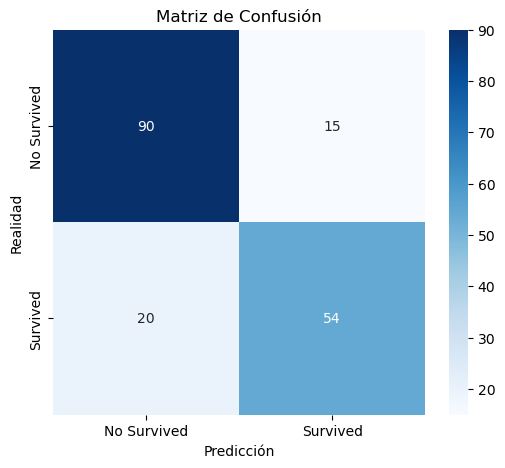

In [32]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

El modelo presenta algunos errores en sus predicciones, sin embargo, muestra una excelente capacidad de generalización, como se observa en la matriz de confusión, donde la diagonal principal tiene un color más intenso en comparación con la diagonal de errores. 

#### Importancia de caracteristicas:


Importancia de las características (Coeficientes):
    Feature  Coefficient
3  Sex_male    -2.462030
0    Pclass    -1.004277
2  Fare_log     0.040601
1       Age    -0.025629


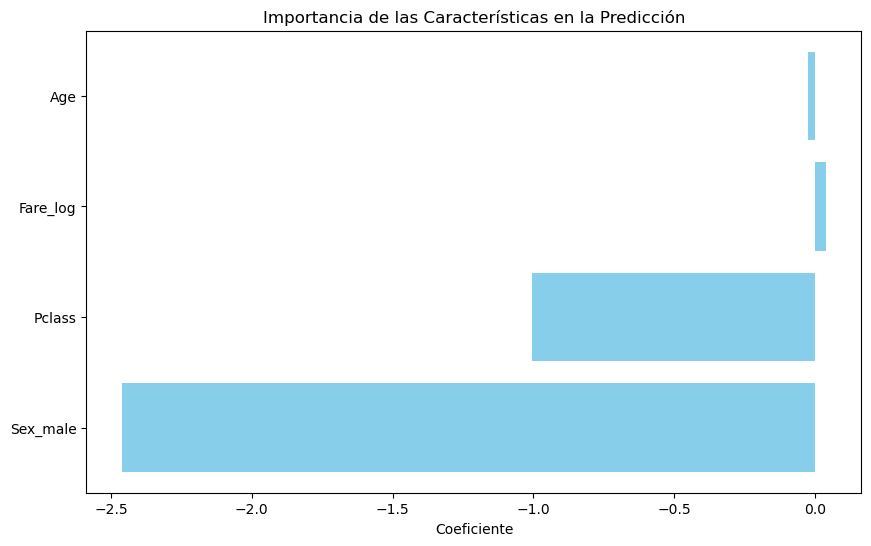

In [34]:
coefficients = logreg.coef_[0]  

features = X_train.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nImportancia de las características (Coeficientes):")
print(coef_df[['Feature', 'Coefficient']])

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Importancia de las Características en la Predicción')
plt.show()

El anterior grafico muestra la importancia a la hora de predecir survived (clase target ), se muestra que el sexo es muy importante para determinar la clase target al igual que la clase de embarque, esto se debe a que las muejres se salvaron mas; debido ala percepción de  "_Mujeres y niños primero_"

# Conclusiones:

El conjunto de datos fue adecuado para el entrenamiento del modelo; sin embargo, hubo ausencias importantes en la columna de edad. Otras variables, como la cabina, no mostraron una relevancia significativa debido a la gran cantidad de valores faltantes, los cuales resultan difíciles de interpretar sin un diccionario de datos. A pesar de estas limitaciones, la regresión logística demostró una excelente capacidad de generalización al predecir las variables seleccionadas.